# Exam2

#### 64090500404 นายธัญพิสิษฐ์ บัวประคอง

#### 64090500405 นางสาวปุณณภา เทียนชัย

#### 64090500409 นายอวิรุทธิ์ ภู่แสนสอาด

#### 64090500443 นายภูมิพัฒน์ กรเจริญพิสุทธิ์


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

### Problem 1: From the given Korean data file,
compare the number of movies of the following genres(Comedy, Romance, Drama, Fantastic and Thriller) in each year during 2016 to 2021 (Show on the same chart the average rating of movies of each genre in each year)


In [2]:
df = pd.read_csv("../data/Korean.csv") 
df = df[["Title","Year","Genre","Rating"]]
df['Rating'] = pd.to_numeric(df['Rating'],errors='coerce')

In [3]:
res = []
for i in range(len(df)): 
    q = str(df["Year"][i])
    if "an" in q: 
        continue
    if "I" in q:
        q = q.split(" ")[1]
        if len(q) <= 8: 
           df["Year"][i] = q[1:5],q[1:5]
        else: 
           df["Year"][i] = q[1:5],q[6:10]
    elif len(q)<=8:
        df["Year"][i] = q[1:5],q[1:5]
    else:
        df["Year"][i] = q[1:5],q[6:10]
    df["Genre"][i] = df["Genre"][i].split(",")
    for z in range(len(df["Genre"][i])):
        for m in range(int(df["Year"][i][0]),int(df["Year"][i][1])+1):
            res.append([df["Genre"][i][z],m,df["Rating"][i]])

/var/folders/tr/sjr4bh_d1sj6dyxjdxkhc1680000gn/T/ipykernel_387/4187236117.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"][i] = q[1:5],q[1:5]
/var/folders/tr/sjr4bh_d1sj6dyxjdxkhc1680000gn/T/ipykernel_387/4187236117.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Genre"][i] = df["Genre"][i].split(",")
/var/folders/tr/sjr4bh_d1sj6dyxjdxkhc1680000gn/T/ipykernel_387/4187236117.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [ ]:
for i in res: 
    rk = pd.DataFrame(res,columns=["Genre","Year","Rating"])

rk = rk[rk['Genre'].isin(['Drama','Comedy','Romance','Thriller','Fantasy'])] 
rk = rk[rk['Year']>=2016] 
rk = rk[rk['Year']<=2021]

In [36]:
df_count = pd.DataFrame(rk.groupby(['Genre','Year']).count())
df_count = df_count.reset_index() 
df_count = df_count.rename(columns={'Rating':'Count'})
df_mean = pd.DataFrame(rk.groupby(["Genre","Year"]).mean())
df_mean = df_mean.reset_index()
df_total = pd.merge(df_count,df_mean,on=['Genre','Year'])
df_total = df_total.rename(columns={'Rating':'Mean'})

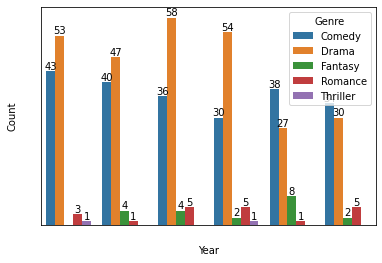

In [37]:
ax = sns.barplot(x="Year", y="Count", hue="Genre", data=df_total,errwidth=0)
for i in ax.containers:
    ax.bar_label(i,)

<AxesSubplot:xlabel='Year', ylabel='Count'>

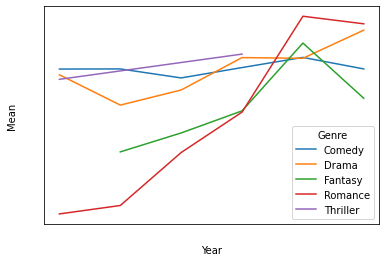

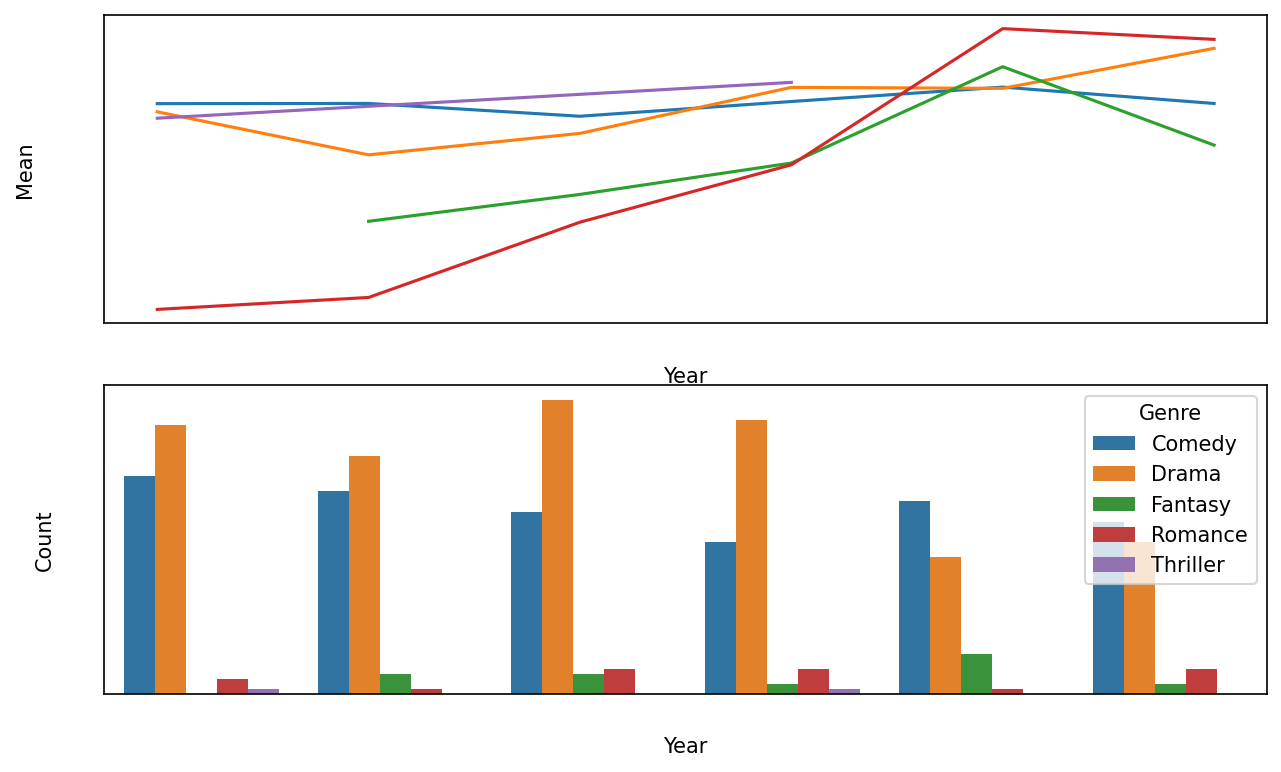

In [38]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=150)
plt.subplot(2,1,1)
sns.lineplot(data=df_total,x="Year", y="Mean", hue="Genre",legend=False) 

plt.subplot(2,1,2)
sns.barplot(data=df_total,x="Year", y="Count", hue="Genre")

### Problem 2: From the given Covid data file,
compare the smoothed new cases per million of people and smoothed new deaths per million of people (Investigate only Thailand, Japan, Singapore, India, Egypt, USA, and United Kingdom, during 1/1/2021 to 30/6/2022)


In [10]:
import plotly.express as px

In [12]:
df = pd.read_csv('../data/Covid.csv') 
df = df[df['location'].isin(['Thailand','Japan','Singapore','India','Egypt','United States','United Kingdom'])] 
df = df[df['date'] >= '2021-01-01']
df = df[df['date'] <= '2022-06-30']

ที่ทำแบบนี้เพราะโจทย์ข้อนี้ต้องการที่จะไปลงทุนในประเทศในชื่อซึ่งเค้ากำหนดเป็นอัตรา newcases_smoothed และ death_smoothed เอามา plot เป็นเส้นแบบนี้เพื่อจะได้ดู 2 กราฟระหว่างการตาย และการติดเชื้อเพื่อดูว่าประเทศต่างๆจะเป็นอย่างไร จึงได้ออกมา 2 กราฟและเห็นอัตราของเชื้อโควิตอย่างชัดเจน

In [ ]:
newcase_fig = px.line(df, x='date', y='new_cases_smoothed', color='location', title='New Cases') 
deaths_fig = px.line(df, x='date', y='new_deaths_smoothed', color='location', title='New Deaths') 

newcase_fig.show()
deaths_fig.show()

### Problem 3: From the given US-accident data file, 
the last 7 columns (Crossing, Give_Way, …, Stop) indicate presence of such entities in a nearby location.


In [2]:
import missingno as mn
import plotly.graph_objects as go

#### 3.1  Compare and show proportions of accidents occurring in each day of week (Mon. – Sun.), side by side with the proportions of accidents occurring in the morning (6:01 – 12:00), afternoon (12:01 – 18:00), evening (18:01 – 0:00), and night (0:01 – 6:00)
aloso, show the number of accidents accordingly

In [3]:
df=pd.read_csv('../data/US-accidents.csv')

In [10]:
# เพิ่มวันที่
def ntn(day):
  if day == 1:
    return 'Monday'
  if day == 2:
    return 'Tuesday'
  if day == 3:
    return 'Wednesday'
  if day == 4:
    return 'Thursday'
  if day == 5:
    return 'Friday'
  if day == 6:
    return 'Saturday'
  if day == 0:
    return 'Sunday'
df["Day of week"]= pd.to_datetime(df['Start_Time']).dt.dayofweek.apply(ntn)
df

,ID,Severity,Start_Time,City,State,Zipcode,Temperature(F),Weather_Condition,Crossing,Give_Way,...,Railway,Roundabout,Stop,Day of week,morning,afternoon,evening,night,time,isAccident
0,A-1381851,2,2021-09-15 18:07:32.000000000,Blue Bell,PA,19422-1717,87.0,Mostly Cloudy,0,0,...,0,0,0,Tuesday,False,False,True,False,evening,0
1,A-2687499,2,2018-02-07 11:52:27,Cleveland,OH,44130,21.9,Light Snow,0,0,...,0,0,0,Tuesday,True,False,False,False,morning,0
2,A-1922192,2,2020-12-01 21:08:30,Fairfield,CA,94534,42.0,Fair,0,0,...,0,0,0,Monday,False,False,True,False,evening,0
3,A-911390,2,2021-06-13 12:13:00.000000000,Tehachapi,CA,93561-8089,81.0,Fair,0,0,...,0,0,0,Saturday,False,True,False,False,afternoon,0
4,A-103256,4,2016-05-20 23:38:45,Columbus,OH,43215,55.9,Light Rain,0,0,...,0,0,1,Thursday,False,False,True,False,evening,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-1619695,2,2021-01-15 02:37:30.000000000,Glastonbury,CT,06033,34.0,Fog,0,0,...,0,0,0,Thursday,False,False,False,True,night,0
499996,A-466164,2,2021-07-09 10:39:19,Columbia,SC,29210-5424,86.0,Partly Cloudy,0,0,...,0,0,0,Thursday,True,False,False,False,morning,0
499997,A-220691,2,2017-07-25 15:09:02,Miami,FL,33156-2630,86.0,Thunderstorm,1,1,...,0,0,0,Monday,False,True,False,False,afternoon,2
499998,A-1329176,2,2021-06-11 05:40:00.000000000,Dos Palos,CA,93620-9715,51.0,Fair,0,0,...,0,0,0,Thursday,False,False,False,True,night,0


In [5]:
# ฟังชันเช็คว่าอยู่ในช่วงเวลาไหน 
import datetime
def time_in_range(x, start, end):
    if start <= end:
        return start <= x <= end
    else:
        return start <= x or x <= end

In [9]:
# แต่ละวันเกิดอุบัติเหตุช่วงใดบ้าง
import datetime
df['morning'] = pd.DataFrame(pd.to_datetime(df['Start_Time']).dt.time.apply(lambda x: time_in_range(x, datetime.time(6, 0, 1), datetime.time(12, 0, 0))))
df['afternoon'] = pd.DataFrame(pd.to_datetime(df['Start_Time']).dt.time.apply(lambda x: time_in_range(x, datetime.time(12, 0, 1), datetime.time(18, 0, 0))))
df['evening'] = pd.DataFrame(pd.to_datetime(df['Start_Time']).dt.time.apply(lambda x: time_in_range(x, datetime.time(18, 0, 1), datetime.time(0, 0, 0))))
df['night'] = pd.DataFrame(pd.to_datetime(df['Start_Time']).dt.time.apply(lambda x: time_in_range(x, datetime.time(0, 0, 1), datetime.time(6, 0, 0))))

def time(m, a, e, n):
   if m==True : return 'morning'
   if a==True : return 'afternoon'
   if e==True : return 'evening'
   if n==True : return 'night'
df['time'] = df.apply(lambda x : time(x['morning'], x['afternoon'],x['evening'],x['night'] ),  axis=1 )
df

,ID,Severity,Start_Time,City,State,Zipcode,Temperature(F),Weather_Condition,Crossing,Give_Way,...,Railway,Roundabout,Stop,Day of week,morning,afternoon,evening,night,time,isAccident
0,A-1381851,2,2021-09-15 18:07:32.000000000,Blue Bell,PA,19422-1717,87.0,Mostly Cloudy,0,0,...,0,0,0,Tuesday,False,False,True,False,evening,0
1,A-2687499,2,2018-02-07 11:52:27,Cleveland,OH,44130,21.9,Light Snow,0,0,...,0,0,0,Tuesday,True,False,False,False,morning,0
2,A-1922192,2,2020-12-01 21:08:30,Fairfield,CA,94534,42.0,Fair,0,0,...,0,0,0,Monday,False,False,True,False,evening,0
3,A-911390,2,2021-06-13 12:13:00.000000000,Tehachapi,CA,93561-8089,81.0,Fair,0,0,...,0,0,0,Saturday,False,True,False,False,afternoon,0
4,A-103256,4,2016-05-20 23:38:45,Columbus,OH,43215,55.9,Light Rain,0,0,...,0,0,1,Thursday,False,False,True,False,evening,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-1619695,2,2021-01-15 02:37:30.000000000,Glastonbury,CT,06033,34.0,Fog,0,0,...,0,0,0,Thursday,False,False,False,True,night,0
499996,A-466164,2,2021-07-09 10:39:19,Columbia,SC,29210-5424,86.0,Partly Cloudy,0,0,...,0,0,0,Thursday,True,False,False,False,morning,0
499997,A-220691,2,2017-07-25 15:09:02,Miami,FL,33156-2630,86.0,Thunderstorm,1,1,...,0,0,0,Monday,False,True,False,False,afternoon,2
499998,A-1329176,2,2021-06-11 05:40:00.000000000,Dos Palos,CA,93620-9715,51.0,Fair,0,0,...,0,0,0,Thursday,False,False,False,True,night,0


In [11]:
#เช็คว่าวันนัันเกิดอุบัติเหตุไหม
df['Crossing'] = df['Crossing'].astype(int)
df['Give_Way'] = df['Give_Way'].astype(int)
df['Junction'] = df['Junction'].astype(int)
df['No_Exit'] = df['No_Exit'].astype(int)
df['Railway'] = df['Railway'].astype(int)
df['Roundabout'] = df['Roundabout'].astype(int)
df['Stop'] = df['Stop'].astype(int)

df['isAccident'] = df[['Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Stop']].sum(axis=1)
df

,ID,Severity,Start_Time,City,State,Zipcode,Temperature(F),Weather_Condition,Crossing,Give_Way,...,Railway,Roundabout,Stop,Day of week,morning,afternoon,evening,night,time,isAccident
0,A-1381851,2,2021-09-15 18:07:32.000000000,Blue Bell,PA,19422-1717,87.0,Mostly Cloudy,0,0,...,0,0,0,Tuesday,False,False,True,False,evening,0
1,A-2687499,2,2018-02-07 11:52:27,Cleveland,OH,44130,21.9,Light Snow,0,0,...,0,0,0,Tuesday,True,False,False,False,morning,0
2,A-1922192,2,2020-12-01 21:08:30,Fairfield,CA,94534,42.0,Fair,0,0,...,0,0,0,Monday,False,False,True,False,evening,0
3,A-911390,2,2021-06-13 12:13:00.000000000,Tehachapi,CA,93561-8089,81.0,Fair,0,0,...,0,0,0,Saturday,False,True,False,False,afternoon,0
4,A-103256,4,2016-05-20 23:38:45,Columbus,OH,43215,55.9,Light Rain,0,0,...,0,0,1,Thursday,False,False,True,False,evening,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,A-1619695,2,2021-01-15 02:37:30.000000000,Glastonbury,CT,06033,34.0,Fog,0,0,...,0,0,0,Thursday,False,False,False,True,night,0
499996,A-466164,2,2021-07-09 10:39:19,Columbia,SC,29210-5424,86.0,Partly Cloudy,0,0,...,0,0,0,Thursday,True,False,False,False,morning,0
499997,A-220691,2,2017-07-25 15:09:02,Miami,FL,33156-2630,86.0,Thunderstorm,1,1,...,0,0,0,Monday,False,True,False,False,afternoon,2
499998,A-1329176,2,2021-06-11 05:40:00.000000000,Dos Palos,CA,93620-9715,51.0,Fair,0,0,...,0,0,0,Thursday,False,False,False,True,night,0


In [12]:
# สรุปแต่ละวัน
import math
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

dft =pd.DataFrame(df.groupby(by=['Day of week', 'time'])['isAccident'].sum())

dft_p = dft.pivot_table('isAccident','Day of week','time')
dft_p['sum'] = dft_p.sum(axis=1)
ldata = dft_p
ldata

time,afternoon,evening,morning,night,sum
Day of week,,,,,
Friday,3624,2723,2111,1930,10388
Monday,6968,3163,4380,1659,16170
Saturday,2665,2191,1565,1814,8235
Sunday,6490,2910,4104,1624,15128
Thursday,7787,3763,4225,1923,17698
Tuesday,7166,3305,4369,1849,16689
Wednesday,7270,3510,4379,1859,17018


In [13]:
# sort data by sorter
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ldata = ldata.reindex(days)
ldata = ldata.reindex(columns = ['morning', 'afternoon', 'evening', 'night'])

sumAc = 0
as_list = ldata.index.tolist()
for i,j in zip(days, range(len(days))):
  sumAc += ldata.loc[i].sum()
  as_list[j]+= " (" +str(ldata.loc[i].sum())+")"
ldata.index = as_list
ldata

time,morning,afternoon,evening,night
Sunday (15128),4104,6490,2910,1624
Monday (16170),4380,6968,3163,1659
Tuesday (16689),4369,7166,3305,1849
Wednesday (17018),4379,7270,3510,1859
Thursday (17698),4225,7787,3763,1923
Friday (10388),2111,3624,2723,1930
Saturday (8235),1565,2665,2191,1814


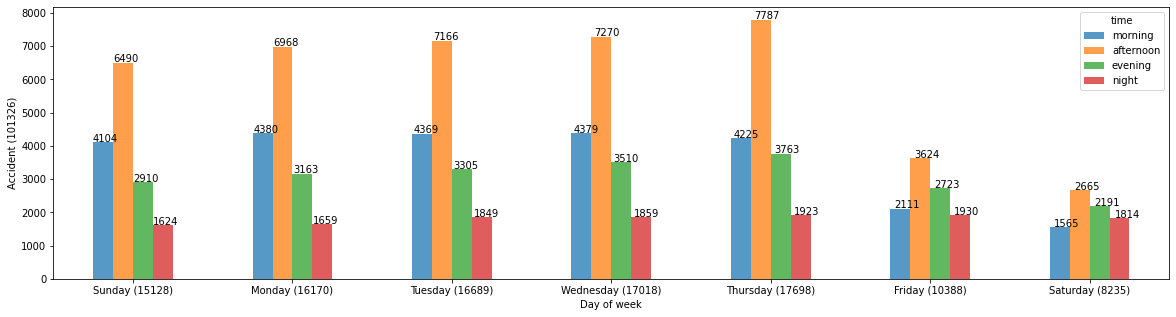

In [14]:
ax = ldata.plot(kind="bar", alpha=0.75, rot=0)
fig = ax.get_figure()
fig.set_size_inches(20, 5)
ax.set_xlabel("Day of week")
ax.set_ylabel("Accident ({})".format(sumAc))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

#### 3.2  For each of the top 12 states having the highest number of accidents, show the numbers of accidents occurring under each weather condition
for each state, show only the top 5 weather conditions and show charts of such 12 states in a grid of 4 rows by 3 columns

Text(0.5, 1.0, 'Top 12 Accidents with State ')

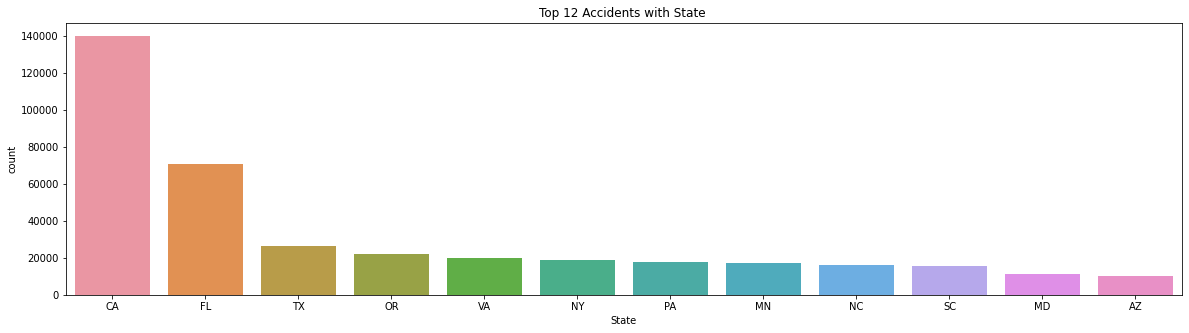

In [15]:
data=pd.read_csv('../data/US-accidents.csv')
fig, ax = plt.subplots(figsize = (20,5))
cc = sns.countplot(x="State", data=data, orient = 'v', order = data['State'].value_counts().iloc[:12].index)
cc.set_title("Top 12 Accidents with State ")

In [16]:
df_agg = df.groupby(['State', 'Weather_Condition'] ).agg({'isAccident':sum})
g = df_agg['isAccident'].groupby('State', group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False))
c = res.to_frame()
c
byState = c.pivot_table('isAccident',['State'], 'Weather_Condition')
byState['sum'] = byState.sum(axis=1)
sortbyStateSum = byState.sort_values(by=['sum'], ascending = False)
sortbyStateSum.sort_values(by='sum', ascending=False).head(12)

Weather_Condition,Blowing Dust,Blowing Dust / Windy,Blowing Snow,Blowing Snow / Windy,Clear,Cloudy,Cloudy / Windy,Drizzle,Drizzle and Fog,Fair,...,Thunder / Wintry Mix / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Tornado,Widespread Dust,Widespread Dust / Windy,Wintry Mix,Wintry Mix / Windy,sum
State,,,,,,,,,,,,,,,,,,,,,
CA,3.0,0.0,NaN,NaN,2858.0,2591.0,35.0,11.0,NaN,12692.0,...,NaN,13.0,0.0,0.0,NaN,1.0,1.0,2.0,NaN,26983.0
FL,NaN,NaN,NaN,NaN,533.0,1355.0,18.0,0.0,NaN,6271.0,...,NaN,158.0,21.0,9.0,0.0,1.0,NaN,NaN,NaN,15782.0
TX,1.0,NaN,NaN,NaN,509.0,658.0,9.0,5.0,0.0,1593.0,...,0.0,6.0,5.0,4.0,NaN,1.0,NaN,4.0,NaN,5496.0
NY,NaN,NaN,0.0,0.0,285.0,675.0,22.0,0.0,3.0,1150.0,...,NaN,4.0,0.0,NaN,NaN,NaN,NaN,15.0,NaN,4888.0
AZ,NaN,NaN,NaN,NaN,245.0,159.0,1.0,1.0,NaN,2603.0,...,NaN,6.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,3950.0
PA,NaN,NaN,NaN,NaN,145.0,748.0,20.0,2.0,NaN,1271.0,...,NaN,4.0,1.0,NaN,NaN,NaN,NaN,7.0,NaN,3669.0
NC,NaN,NaN,NaN,NaN,180.0,446.0,2.0,4.0,0.0,928.0,...,NaN,3.0,5.0,1.0,NaN,NaN,NaN,4.0,NaN,3631.0
MN,NaN,NaN,0.0,0.0,140.0,554.0,12.0,5.0,0.0,1141.0,...,NaN,1.0,1.0,0.0,NaN,NaN,NaN,18.0,NaN,3041.0
OR,NaN,0.0,NaN,NaN,182.0,578.0,7.0,4.0,NaN,752.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,9.0,1.0,2980.0


In [17]:
top12 = ['CA', 'FL', 'TX', 'OR', 'VA', 'NY', 'PA', 'MN','NC', 'SC', 'MD', "AZ"]
top12

['CA', 'FL', 'TX', 'OR', 'VA', 'NY', 'PA', 'MN', 'NC', 'SC', 'MD', 'AZ']

In [18]:
dft = df
dft = df[df['State'].isin(top12)]
dft

,ID,Severity,Start_Time,City,State,Zipcode,Temperature(F),Weather_Condition,Crossing,Give_Way,...,Railway,Roundabout,Stop,Day of week,morning,afternoon,evening,night,time,isAccident
0,A-1381851,2,2021-09-15 18:07:32.000000000,Blue Bell,PA,19422-1717,87.0,Mostly Cloudy,0,0,...,0,0,0,Tuesday,False,False,True,False,evening,0
2,A-1922192,2,2020-12-01 21:08:30,Fairfield,CA,94534,42.0,Fair,0,0,...,0,0,0,Monday,False,False,True,False,evening,0
3,A-911390,2,2021-06-13 12:13:00.000000000,Tehachapi,CA,93561-8089,81.0,Fair,0,0,...,0,0,0,Saturday,False,True,False,False,afternoon,0
5,A-1216707,2,2021-04-30 05:57:30,Los Angeles,CA,90015,61.0,Fair,0,0,...,0,0,0,Thursday,False,False,False,True,night,0
8,A-818762,2,2021-10-26 16:19:49.000000000,Miami,FL,33175,90.0,Fair,0,0,...,0,0,0,Monday,False,True,False,False,afternoon,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,A-988708,2,2021-07-03 02:55:00,La Puente,CA,91746-2237,66.0,Fair,0,0,...,0,0,0,Friday,False,False,False,True,night,0
499996,A-466164,2,2021-07-09 10:39:19,Columbia,SC,29210-5424,86.0,Partly Cloudy,0,0,...,0,0,0,Thursday,True,False,False,False,morning,0
499997,A-220691,2,2017-07-25 15:09:02,Miami,FL,33156-2630,86.0,Thunderstorm,1,1,...,0,0,0,Monday,False,True,False,False,afternoon,2
499998,A-1329176,2,2021-06-11 05:40:00.000000000,Dos Palos,CA,93620-9715,51.0,Fair,0,0,...,0,0,0,Thursday,False,False,False,True,night,0


In [19]:
df_agg2 = dft.groupby(['State', 'Weather_Condition'] ).agg({'Weather_Condition':'count'})
d = df_agg2['Weather_Condition'].groupby('State', group_keys=False)
d = d.apply(lambda x: x.sort_values(ascending=False))
c2 = d.to_frame()
c2 = c2.groupby(level=0).head(5)

In [20]:
sumc = c2.groupby(level=[0]).sum()
b = sumc.values.tolist()
blist = []
for i in b:
  for j in range(7):
    blist.append(i[0])
sumc

,Weather_Condition
State,
AZ,8925
CA,114800
FL,60778
MD,7933
MN,13779
NC,13207
NY,14349
OR,15988
PA,14371


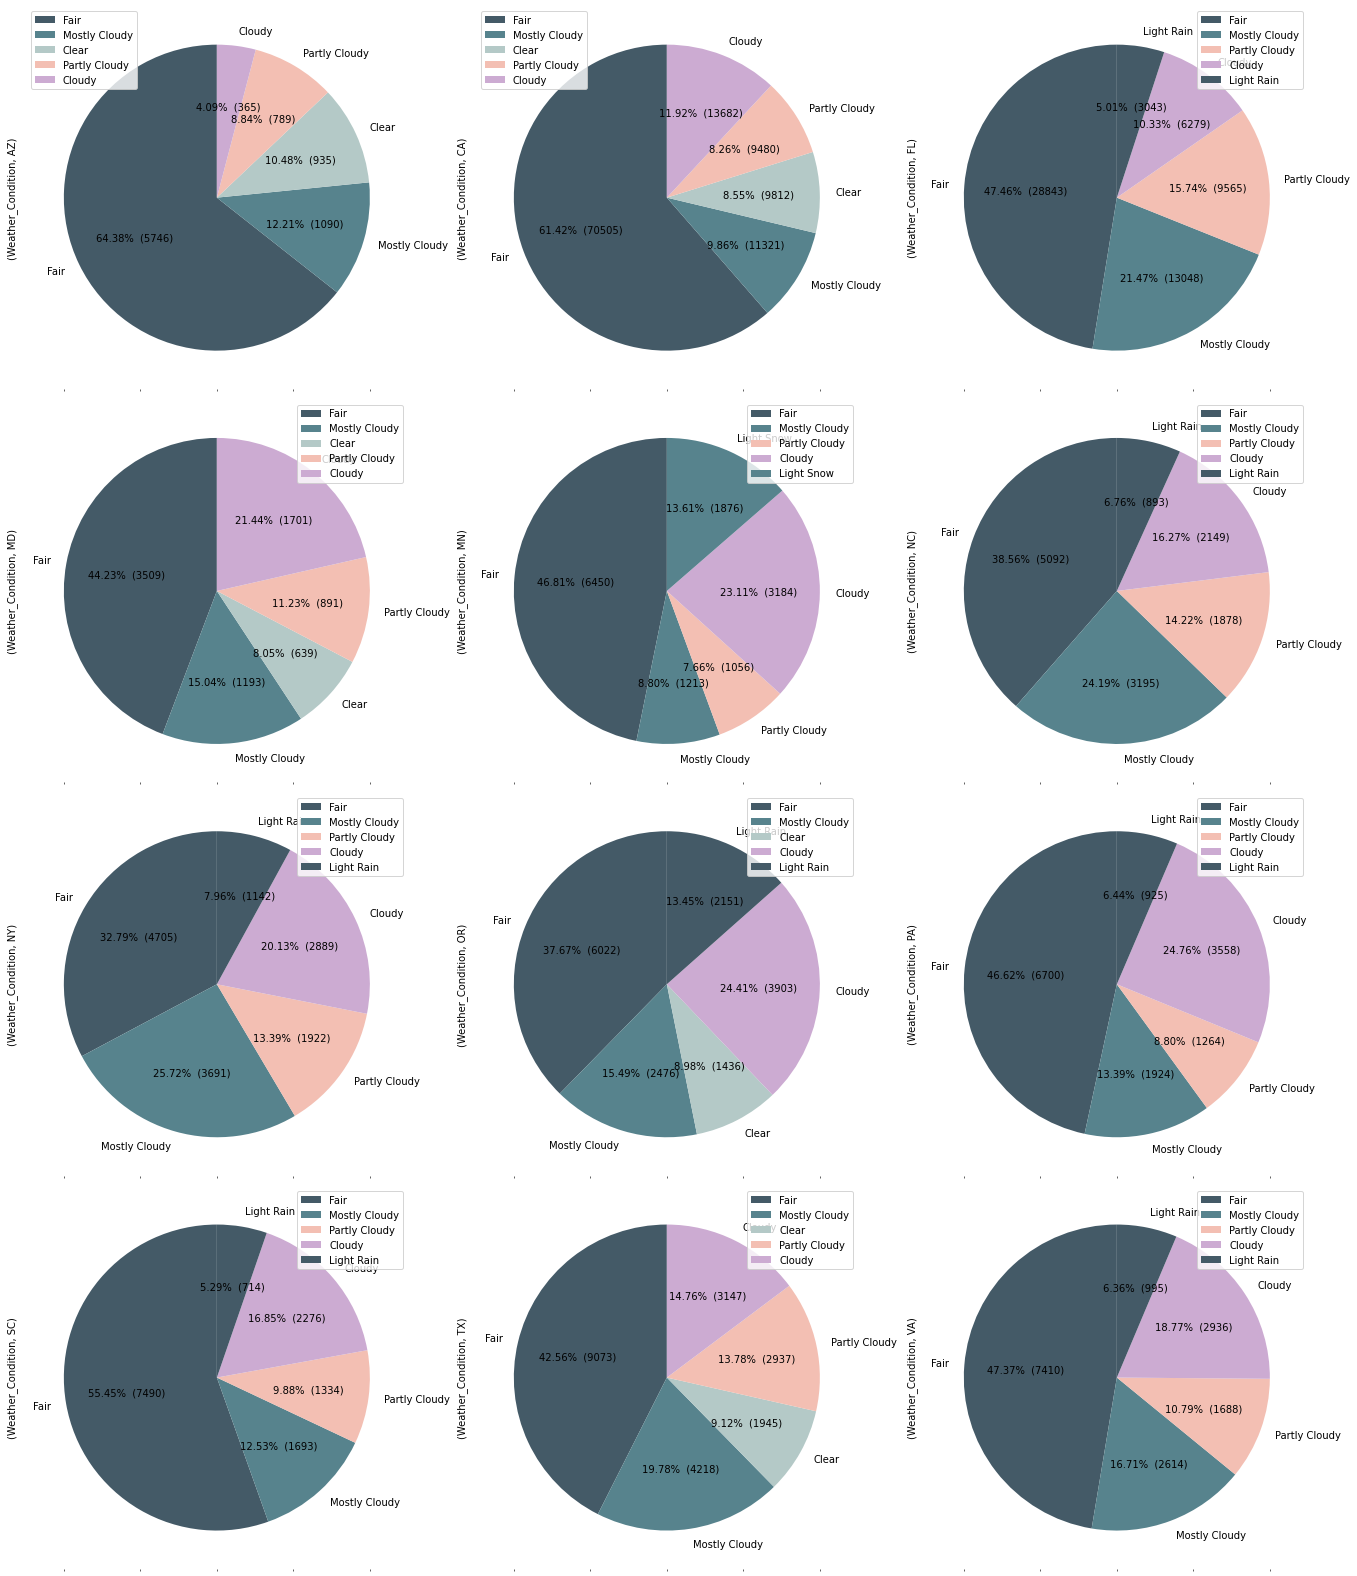

In [21]:
n = 0
def make_autopct(vals):
    global n
    def my_autopct(pct):
        global n
        total = vals[n]
        n+=1
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val) if  val >0 else ''
    return my_autopct
colors = ['#445a67','#57838d','#b4c9c7','#f3bfb3', '#ccabd2']
ax = c2.unstack(level=0).plot(kind='pie', subplots=True, rot=0, figsize=(19, 22), layout=(4, 3), autopct=make_autopct(blist), shadow=False, startangle=90, colors=colors)
plt.tight_layout()

#### 3.3 Using the whole data, present the findings of number of accidents concerning with the different (seven) entities

In [3]:
data=pd.read_csv('../data/US-accidents.csv')

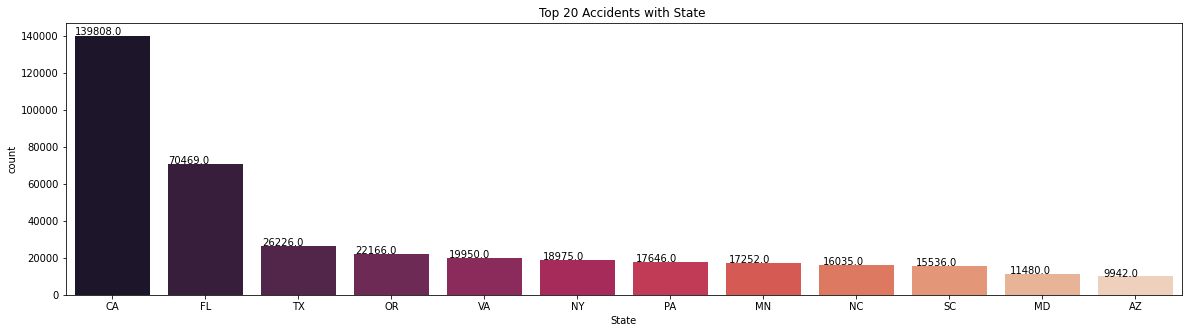

In [4]:
# Chart 1 Top 20 most accident with State 
# กราฟแสดงรัฐที่เกิดอุบัติเหตุมากที่สุด 20 อันดับ โดยรัฐที่มากที่สุดคือ CA california
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="State", data=data, orient = 'v', palette = "rocket", order = data['State'].value_counts().iloc[:12].index)
c.set_title("Top 20 Accidents with State ");
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

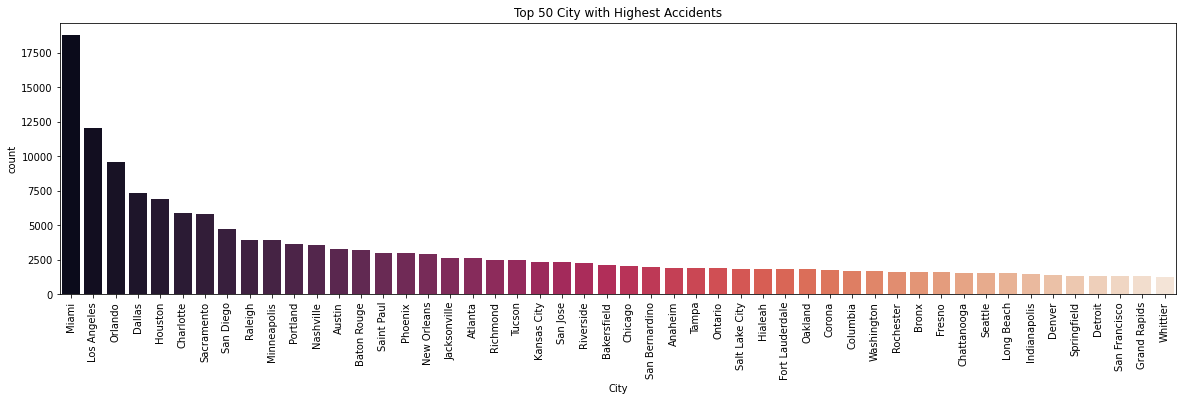

In [5]:
# Chart 2 Top 50 Accident with CIty
# แสดง 50 อันดับเมืองที่เกิดอุบัติเหตุมากที่สุด เมืองที่มากที่สุดคือ ไมอามี
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="City", data=data, order=data.City.value_counts().iloc[:50].index, orient = 'v', palette = "rocket")
c.set_title("Top 50 City with Highest Accidents")
c.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()

In [9]:
data['Month'] = pd.to_datetime(data['Start_Time'],errors='coerce').dt.month
data['Year'] = pd.to_datetime(data['Start_Time'],errors='coerce').dt.year
data['Hour'] = pd.to_datetime(data['Start_Time'],errors='coerce').dt.hour
data['Weekday'] = pd.to_datetime(data['Start_Time'],errors='coerce').dt.weekday
#Year
data_2016 = data[data['Year']  == 2016]
data_2017 = data[data['Year']  == 2017]
data_2018 = data[data['Year']  == 2018]
data_2019 = data[data['Year']  == 2019]
data_2020 = data[data['Year']  == 2020]
data_2017_2019 = data[(data["Year"] >= 2017) & (data["Year"] <= 2019)]

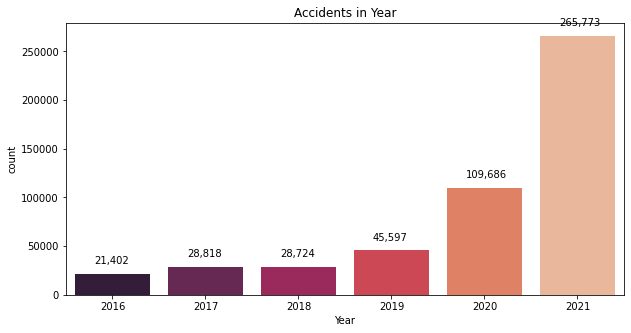

In [10]:
# Chart3 accident in year
# จำนวนอุบัติเหตุตั้งแต่ปี 2016 - 2021
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Year", data=data, orient = 'v', palette = "rocket")
c.set_title("Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+900
    ax.annotate(count, (x, y))
plt.show()

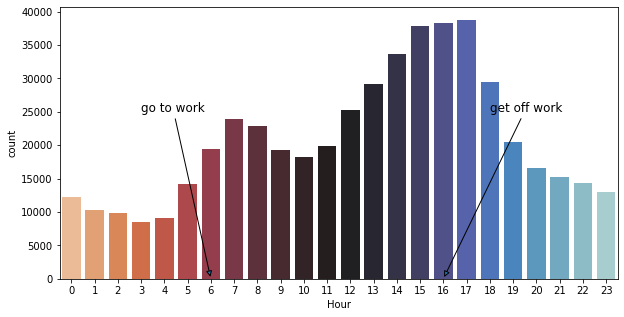

In [11]:
# Chart 4 Accident in hour
# จำนวนอุบัติเหตุด้วยชั่วโมงทำให้เห็นว่า ช่วงเวลาที่คนไปทำงานกับเริ่มงานจะมีอุบัติเหตุมาก
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x="Hour", data=data, orient = 'v', palette = "icefire_r")
plt.annotate('go to work',xy=(6,0),xytext=(3,25000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate('get off work',xy=(16,0),xytext=(18,25000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.show()

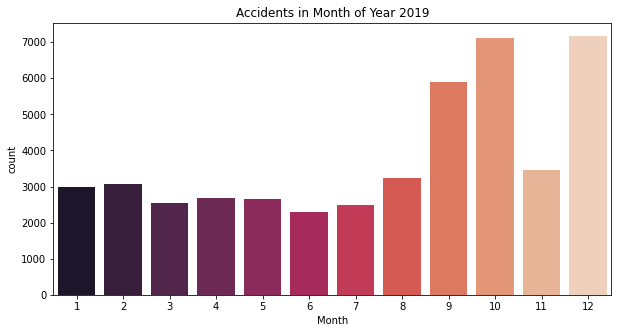

In [12]:
# Chart 5 Accident in year 2019
# แสดงอุบัติเหตแต่ละเดือนในปี 2019
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2019, orient = 'v', palette = "rocket")
c.set_title("Accidents in Month of Year 2019")
plt.show()

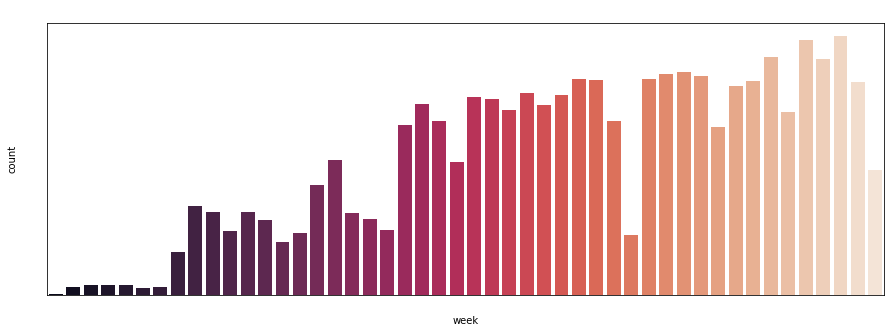

In [29]:
# Chart 6 accident all week
# จำนวนอุบัติเหตุแต่ละสัปดาห์ในปี 2020 
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=pd.to_datetime(data_2016['Start_Time']).dt.isocalendar().week, data=data_2016, orient = 'v', palette = "rocket")
c.set_title("Accidents in Week of 2020",c='w')
plt.show()

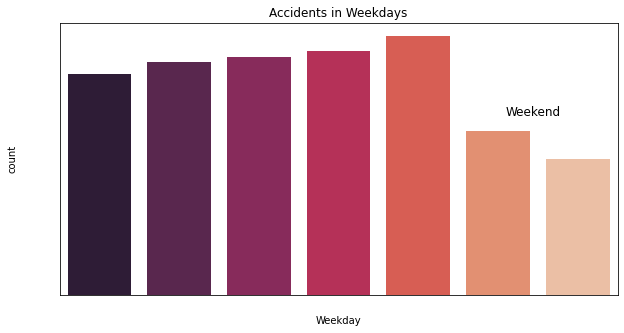

In [30]:
# Chart 7 Accident in Week day
# แสดงจำนวนอุบัติเหตุในแต่ละวัน อาทิตย์ - เสาร์ ทำให้เห็นว่าช่วง ศุกร์และเสาร์อุบัติเหตุจะน้อยเพราะคนหยุดงาน
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Weekday", data=data, orient = 'v', palette = "rocket")
plt.annotate('Weekend',xy=(5.1,60000), fontsize=12)
c.set_title("Accidents in Weekdays")
plt.show()

### Problem 4: “หากท่านต้องแบกท่อเหล็กยาวท่อนหนึ่งไปตามทางที่กว้าง 9 ฟุต แล้วจะต้องเลี้ยวขวา 90 องศาเพื่อไปต่อตามทางที่กว้างเหลือเพียง 6 ฟุต ถามว่าท่อเหล็กนี้จะต้องยาวไม่เกินกี่ฟุตถึงจะเลี้ยวขวาที่มุมนี้ได้ โดยท่านต้องไม่เอียงท่อนเหล็ก (นั่นคือถือแนวระนาบตลอด)”

In [14]:
from scipy.optimize import linprog
import math

In [15]:
theta = np.arctan((9/6)**(1/3))
c = np.array([[0.0,0.0,-1.0]])
lhs_ineq = np.array([[-1.0,-1.0,1.0]])
rhs_ineq = np.array([[0.0]])
lhs_eq = np.array([[1.0,0.0,0.0],[0.0,1.0,0.0]])
rhs_eq = np.array([[6*(np.cos(theta)**-1)],[9*(np.sin(theta))**-1]])

In [16]:
x0_bounds = (None, None)
x1_bounds = (None, None)
x2_bounds = (None, None)
bounds = [x0_bounds, x1_bounds, x2_bounds]

In [17]:
result = linprog(c, A_ub=lhs_ineq, b_ub=rhs_ineq, A_eq=lhs_eq, b_eq=rhs_eq, bounds=bounds)
print('ท่อเหล็กนี้จะต้องยาวไม่เกิน: {} ฟุต'.format(result.fun*-1))

ท่อเหล็กนี้จะต้องยาวไม่เกิน: 21.070447137659897 ฟุต


### Problem 5:  given 𝑥(i) ∈ [−500, 500] for all i= 1, ..., d.Where d is the number of decision variables. Find the solutions of both d = 7 and d = 70

In [18]:
from scipy.optimize import minimize

In [19]:
def func1(x):
    res = 0
    addition = 0
    multi = 1

    for i in range(7):
        addition += (x[i])**2 / 4000

    for j in range(7):
        multi *= np.cos(x[j]/np.sqrt(j+1))
    res = addition - multi + 1
    return res 

def func2(x):
    res = 0
    addition = 0
    multi = 1

    for i in range(70):
        addition += (x[i])**2 / 4000

    for j in range(70):
        multi *= np.cos(x[j]/np.sqrt(j+1))
    res = addition - multi + 1
    return res 

In [20]:
b = (-500,500)
x0_1 = np.random.randint(low=-0.00000005,high=1, size=7)
x0_2 = np.random.randint(low=-0.00000005,high=1, size=70)
solution1 = minimize(func1, x0_1, bounds=[b, b, b, b, b, b, b])
solution2 = minimize(func2, x0_2, bounds=[b]*70)
x1 = solution1.x
x2 = solution2.x
print('if D = 7  then min is: ',func1(x1))
print('if D = 70 then min is: ',func2(x2))

if D = 7  then min is:  0.0
if D = 70 then min is:  0.0


### Problem 6: solve the following constrained optimization problem

In [21]:
from scipy.optimize import differential_evolution
from scipy.optimize import NonlinearConstraint, Bounds

In [22]:
def objective(x):
    return 5.3578547 * x[2] * x[2] + 0.8356891 * x[0] * x[4] + 37.293239 * x[0] - 40792.141

def constraint1(x):
    g1 = 85.334407 + 0.0056858 * x[1] * x[4] + 0.0006262 * x[0] * x[3] - 0.0022053 * x[2] * x[4] - 92.0
    return g1

def constraint2(x):
    g2 = -85.334407 - 0.0056858 * x[1] * x[4] - 0.0006262 * x[0] * x[3] + 0.0022053 * x[2] * x[4]
    return g2

def constraint3(x):
    g3 = 80.51249 + 0.0071317 * x[1] * x[4] + 0.0029955 * x[0] * x[1] + 0.0021813 * x[2] * x[2] - 110.0
    return g3

def constraint4(x):
    g4 = -80.51249 - 0.0071317 * x[1] * x[4] - 0.0029955 * x[0] * x[1] - 0.0021813 * x[2] * x[2] + 90.0
    return g4

def constraint5(x):
    g5 = 9.300961 + 0.0047026 * x[2] * x[4] + 0.0012547 * x[0] * x[2] + 0.0019085 * x[2] * x[3] - 25.0
    return g5

def constraint6(x):
    g6 = -9.300961 - 0.0047026 * x[2] * x[4] - 0.0012547 * x[0] * x[2] - 0.0019085 * x[2] * x[3] + 20.0
    return g6

In [23]:
b1 = [78, 102]
b2 = [33, 45]
b3 = [27, 45]
b4 = [27, 45]
b5 = [27, 45]
bounds = [b1,b2,b3,b4,b5]
nlc1 = NonlinearConstraint(constraint1, -np.inf, 0.0)
nlc2 = NonlinearConstraint(constraint2, -np.inf, 0.0)
nlc3 = NonlinearConstraint(constraint3, -np.inf, 0.0)
nlc4 = NonlinearConstraint(constraint4, -np.inf, 0.0)
nlc5 = NonlinearConstraint(constraint5, -np.inf, 0.0)
nlc6 = NonlinearConstraint(constraint6, -np.inf, 0.0)

In [24]:
result = differential_evolution(objective, bounds, constraints=(nlc1,nlc2,nlc3,nlc4,nlc5,nlc6) )
print('Minimize f(x): ',result.fun)

Minimize f(x):  -30665.537615710018
